### Visualizing the customers with dimensionality reduction

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = pd.read_csv("data/customer_final.csv")

C:\Users\natha\AppData\Local\Temp\ipykernel_4636\3537728374.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/customer_final.csv")


In [14]:
df["churn"] = df["churn"].astype(int)

In [15]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'Unnamed: 0.2', "Customer ID", "Invoice_c", "Desciption_c", "Description", "InvoiceDate",  "Time since last purchase" ])

In [16]:

X = df.drop(columns=["churn"])
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

short_df = X_train

In [17]:
short_df

,Quantity_c,Price_c,Invoice,Quantity,Price,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,...,pca_7.2,pca_8,pca_8.1,pca_8.2,pca_9,pca_9.1,pca_9.2,pca_10,pca_10.1,pca_10.2
828,-4.0,2.95,186,2153,528.73,5.257164e+13,979064.670,5.257164e+13,0.982297,37.0,...,-0.650606,-0.030639,0.643023,-0.610515,0.003431,0.492289,-0.716329,-0.023813,0.672020,-0.429290
3490,0.0,0.00,15,163,35.79,4.160435e+12,73731.280,4.160435e+12,0.070000,526652.0,...,-0.408257,-0.068148,0.356986,-0.502371,0.063198,0.357057,-0.223198,-0.044166,0.204001,-0.357276
3710,0.0,0.00,205,304,618.50,5.783717e+13,1082813.625,5.783717e+13,1.062928,41.0,...,-0.829730,0.002860,0.525594,-0.688538,0.031004,0.574880,-0.584988,0.020115,0.672020,-0.621028
3599,0.0,0.00,8,210,52.26,2.409722e+12,38468.050,2.409722e+12,0.036332,1.0,...,-0.229636,0.062656,0.265918,-0.177700,0.098162,0.368397,-0.100318,0.113778,0.337043,-0.201766
276,-314.0,115.44,839,8298,1981.03,2.281614e+14,4256165.770,2.281614e+14,4.217601,159.0,...,-1.003662,-0.016992,0.655815,-0.688538,0.013201,0.625332,-0.705427,-0.027413,0.786559,-1.211741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,0.0,0.00,18,145,70.50,5.146620e+12,90902.060,5.146620e+12,0.085000,534718.0,...,-0.366878,-0.045778,0.372746,-0.373163,0.104173,0.413937,-0.413582,-0.014342,0.371582,-0.288289
2706,0.0,0.00,54,581,145.75,1.454743e+13,275012.480,1.454743e+13,0.273304,10.0,...,-0.486399,-0.025509,0.380919,-0.467347,-0.035286,0.377681,-0.372084,0.132965,0.612862,-0.507045
578,-645.0,46.64,649,4182,1745.80,1.699188e+14,3257377.805,1.699188e+14,3.350700,125.0,...,-0.953854,0.000148,0.717377,-0.531055,0.007567,0.543430,-0.896063,-0.030474,0.879562,-0.621028
5848,0.0,0.00,1,4,110.00,0.000000e+00,0.000,0.000000e+00,0.000000,0.0,...,-0.220368,-0.249158,-0.249158,-0.249158,0.258073,0.258073,0.258073,0.276305,0.276305,0.276305


### Splitting columns


In [18]:
def keep_with_word(lst, word):
    new_lst = []
    for string in lst:
        if word in string:
            new_lst.append(string)
    return new_lst

In [19]:
columns_list = short_df.columns.values.tolist() 

scalar_columns = keep_with_word(columns_list, "scalar")
cluster_columns = keep_with_word(columns_list, "cluster")
pca_columns = keep_with_word(columns_list, "pca")

all_products_features = scalar_columns + cluster_columns + pca_columns

scalars_df = short_df[scalar_columns]
no_products_features_df = short_df.drop(columns=all_products_features)


### Plotting customers churn in two dimensions

In [20]:
scaler = MinMaxScaler()

normalized_scalars_data = scaler.fit_transform(scalars_df)
normalized_no_products_data = scaler.fit_transform(no_products_features_df)


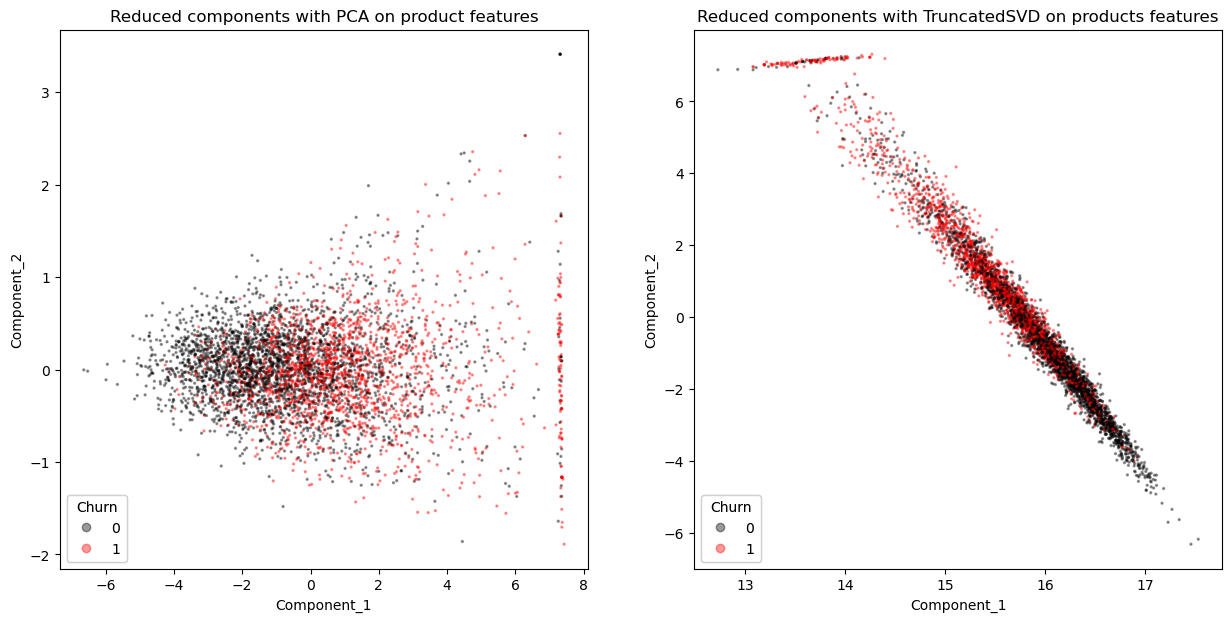

In [21]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=4)
PCA_reduced_features = pca.fit_transform(normalized_scalars_data)

trunc_svd = TruncatedSVD(n_components=2, random_state=4)
trunc_svd_reduced_features = trunc_svd.fit_transform(normalized_scalars_data)

# Creating figure
figure, axis = plt.subplots(1, 2, figsize=(15, 7))

scatter = axis[0].scatter(PCA_reduced_features[:,0], PCA_reduced_features[:,1],c=y_train, cmap='flag_r', s=2, alpha=0.35)
legend1 = axis[0].legend(*scatter.legend_elements(), loc="lower left", title="Churn")
axis[0].add_artist(legend1)
axis[0].set(xlabel='Component_1', ylabel='Component_2')
axis[0].set_title("Reduced components with PCA on product features")


scatter = axis[1].scatter(trunc_svd_reduced_features[:,0], trunc_svd_reduced_features[:,1],c=y_train, cmap='flag_r', s=2, alpha=0.35)
legend1 = axis[1].legend(*scatter.legend_elements(), loc="lower left", title="Churn")
axis[1].add_artist(legend1)
axis[1].set(xlabel='Component_1', ylabel='Component_2')
axis[1].set_title("Reduced components with TruncatedSVD on products features")
plt.savefig("data/dimensionality_red_prod_features.png")
plt.show()


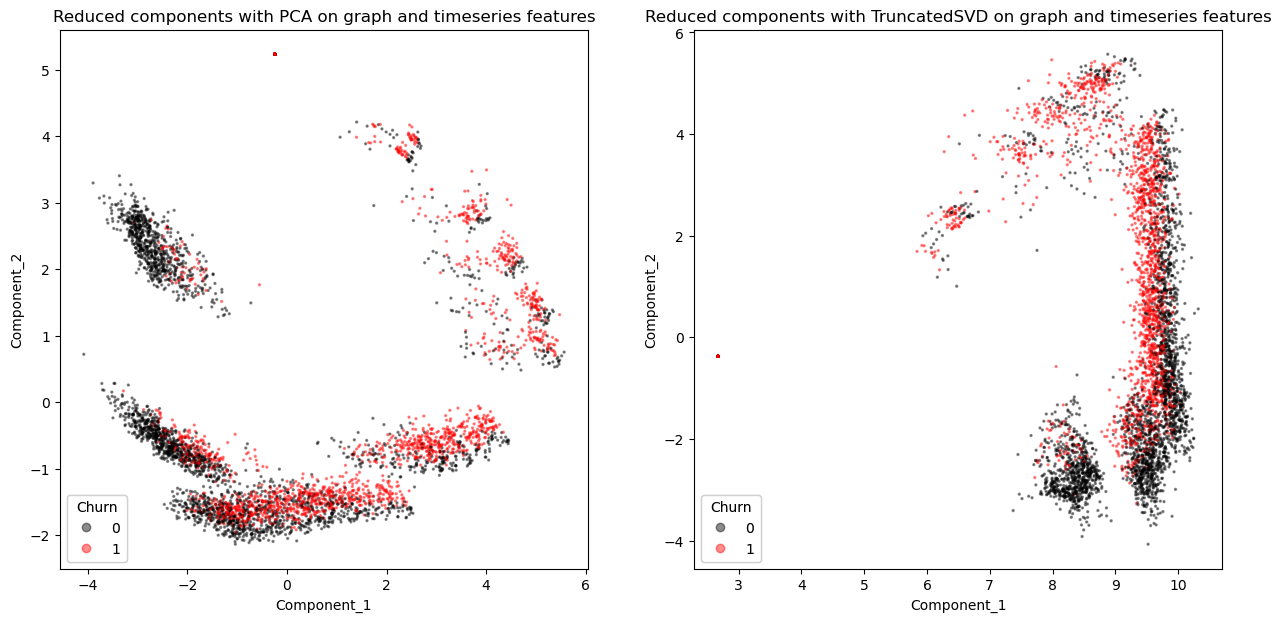

In [22]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=4)
PCA_reduced_features = pca.fit_transform(normalized_no_products_data)

trunc_svd = TruncatedSVD(n_components=2, random_state=4)
trunc_svd_reduced_features = trunc_svd.fit_transform(normalized_no_products_data)

# Creating figure
figure, axis = plt.subplots(1, 2, figsize=(15, 7))

scatter = axis[0].scatter(PCA_reduced_features[:,0], PCA_reduced_features[:,1],c=y_train, cmap='flag_r', s=2, alpha=0.4)
legend1 = axis[0].legend(*scatter.legend_elements(), loc="lower left", title="Churn")
axis[0].add_artist(legend1)
axis[0].set(xlabel='Component_1', ylabel='Component_2')
axis[0].set_title("Reduced components with PCA on graph and timeseries features")


scatter = axis[1].scatter(trunc_svd_reduced_features[:,0], trunc_svd_reduced_features[:,1],c=y_train, cmap='flag_r', s=2, alpha=0.4)
legend1 = axis[1].legend(*scatter.legend_elements(), loc="lower left", title="Churn")
axis[1].add_artist(legend1)
axis[1].set(xlabel='Component_1', ylabel='Component_2')
axis[1].set_title("Reduced components with TruncatedSVD on graph and timeseries features")
plt.savefig("data/dimensionality_red_timser_features.png")

plt.show()